In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('metadata.csv', sep = ',')
df.head()

,Filename,Loc,Acorde,Arquivo Original
0,file_1393.wav,processed_audio/,A#:min,01_SS2-88-F_comp_hex.wav
1,file_1394.wav,processed_audio/,D#:7,01_SS2-88-F_comp_hex.wav
2,file_1395.wav,processed_audio/,G#:maj,01_SS2-88-F_comp_hex.wav
3,file_1396.wav,processed_audio/,C#:maj,01_SS2-88-F_comp_hex.wav
4,file_1397.wav,processed_audio/,G:hdim7,01_SS2-88-F_comp_hex.wav


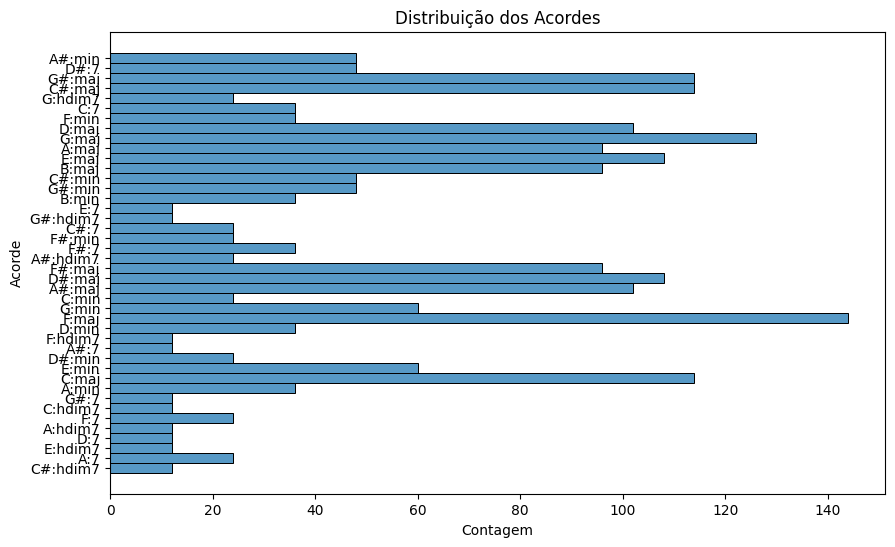

In [16]:
plt.figure(figsize=(10,6))
ax = sns.histplot(y = df['Acorde'] )
ax.set(xlabel = 'Contagem', title = 'Distribuição dos Acordes')
plt.show()